# REDES NEURAIS ARTIFICIAIS

[Aula 3 de Deep Learning](http://bit.ly/dn-unb03) da Engenharia de Software da UnB

In [1]:
# Installing Theano
! pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git --user

# Installing Tensorflow
! pip install --upgrade tensorflow --user

# Installing Keras
! pip install --upgrade keras --user

# Install other packages
! pip install --upgrade pip pandas numpy matplotlib sklearn --user
! pip install pydot --user
! pip install graphviz --user

  Cloning git://github.com/Theano/Theano.git to /tmp/pip-req-build-9zs0ram7
  Running command git clone -q git://github.com/Theano/Theano.git /tmp/pip-req-build-9zs0ram7
  Created wheel for Theano: filename=Theano-1.0.4+23.g630974a7b-cp37-none-any.whl size=2667498 sha256=d7bd4b39a48b28816c22896972da5117062122dafbf0f10783a6a041e74753c5
  Stored in directory: /tmp/pip-ephem-wheel-cache-h7cksoqt/wheels/ae/32/7c/62beb8371953eb20c271b3bac7d0e56e1a2020d46994346b52
Successfully built Theano
  Found existing installation: Theano 1.0.4+23.g630974a7b
    Uninstalling Theano-1.0.4+23.g630974a7b:
      Successfully uninstalled Theano-1.0.4+23.g630974a7b
Requirement already up-to-date: tensorflow in /home/kgd/.local/lib/python3.7/site-packages (2.0.0)
Requirement already up-to-date: keras in /home/kgd/.local/lib/python3.7/site-packages (2.3.1)
Requirement already up-to-date: pip in /home/kgd/.local/lib/python3.7/site-packages (19.3.1)
Requirement already up-to-date: pandas in /home/kgd/.local/lib/p

# Parte 1 - Preprocessamento dos Dados

### Importar as libs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pydot

### Importar o dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
print("X >>\n",X)
print("y >>\n",y)

X >>
 [[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
y >>
 [1 0 1 ... 1 1 0]


### Transformando os dados categóricos


In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]
print("X >>\n",X)

X >>
 [[0.0000000e+00 0.0000000e+00 6.1900000e+02 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 1.0000000e+00 6.0800000e+02 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [0.0000000e+00 0.0000000e+00 5.0200000e+02 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [0.0000000e+00 0.0000000e+00 7.0900000e+02 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [1.0000000e+00 0.0000000e+00 7.7200000e+02 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [0.0000000e+00 0.0000000e+00 7.9200000e+02 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


/home/kgd/.local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/kgd/.local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


# Dividindo o dataset em conjunto de treinamento e conjunto de teste

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

---
# Parte 2 -Vamos construir uma ANN!

## Importando o Keras


In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


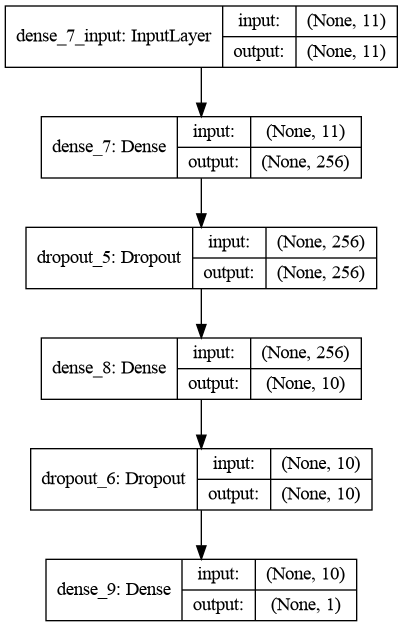

In [10]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
#classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(256, input_dim=11, activation = 'relu'))

classifier.add(Dropout(0.5))
classifier.add(Dense(10, activation = 'softmax'))

classifier.add(Dropout(0.5))
classifier.add(Dense(1, activation ='sigmoid'))

# Adding the second hidden layer
#classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
#classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#print(classifier.summary())

# Ajustando a ANN ao conjunto de treinamento

In [11]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 2s 235us/step - loss: 0.5608 - accuracy: 0.7607
Epoch 2/100
8000/8000 [==============================] - 2s 228us/step - loss: 0.4829 - accuracy: 0.8084
Epoch 3/100
8000/8000 [==============================] - 2s 268us/step - loss: 0.4632 - accuracy: 0.8076
Epoch 4/100
8000/8000 [==============================] - 2s 242us/step - loss: 0.4528 - accuracy: 0.8062
Epoch 5/100
8000/8000 [==============================] - 2s 195us/step - loss: 0.4433 - accuracy: 0.8104
Epoch 6/100
8000/8000 [==============================] - 2s 189us/step - loss: 0.4366 - accuracy: 0.8135
Epoch 7/100
8000/8000 [==============================] - 2s 247us/step - loss: 0.4359 - accuracy: 0.8158
Epoch 8/100
8000/8000 [==============================] - 2s 240us/step - loss: 0.4217 - accuracy: 0.8231
Epoch 9/100
8000/8000 [==============================] - 2s 201us/step - loss: 0.4116 - accuracy: 0.8261
Epoch 10/100
8000/8000 [==============================]

8000/8000 [==============================] - 2s 233us/step - loss: 0.3568 - accuracy: 0.8551
Epoch 79/100
8000/8000 [==============================] - 1s 158us/step - loss: 0.3588 - accuracy: 0.8601
Epoch 80/100
8000/8000 [==============================] - 1s 182us/step - loss: 0.3549 - accuracy: 0.8636
Epoch 81/100
8000/8000 [==============================] - 2s 207us/step - loss: 0.3558 - accuracy: 0.8622
Epoch 82/100
8000/8000 [==============================] - 2s 221us/step - loss: 0.3553 - accuracy: 0.8564
Epoch 83/100
8000/8000 [==============================] - 2s 200us/step - loss: 0.3539 - accuracy: 0.8589
Epoch 84/100
8000/8000 [==============================] - 1s 184us/step - loss: 0.3572 - accuracy: 0.8604
Epoch 85/100
8000/8000 [==============================] - 1s 177us/step - loss: 0.3536 - accuracy: 0.8583
Epoch 86/100
8000/8000 [==============================] - 1s 181us/step - loss: 0.3586 - accuracy: 0.8572
Epoch 87/100
8000/8000 [==============================] - 2

# Parte 3 - Fazendo predições e avaliando o modelo

## Prevendo os resultados com o conjunto de testes

In [12]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Criando uma Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1546   49]
 [ 213  192]]


# Initiate activation function experimentation

# Initialising the 2nd ANN

In [14]:
del classifier

classifier = Sequential()

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 11))

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'tanh'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 1s 144us/step - loss: 3.1467 - accuracy: 0.7960
Epoch 2/100
8000/8000 [==============================] - 1s 171us/step - loss: 3.1467 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 2s 211us/step - loss: 3.1467 - accuracy: 0.7960
Epoch 4/100
8000/8000 [==============================] - 2s 204us/step - loss: 3.1467 - accuracy: 0.7960
Epoch 5/100
8000/8000 [==============================] - 2s 197us/step - loss: 3.1467 - accuracy: 0.7960
Epoch 6/100
8000/8000 [==============================] - 2s 217us/step - loss: 3.1467 - accuracy: 0.7960
Epoch 7/100
8000/8000 [==============================] - 2s 273us/step - loss: 3.1467 - accuracy: 0.7960
Epoch 8/100
8000/8000 [==============================] - 2s 284us/step - loss: 3.1467 - accuracy: 0.7960
Epoch 9/100
8000/8000 [==============================] - 2s 222us/step - loss: 3.1467 - accuracy: 0.7960
Epoch 10/100
8000/8000 [==============================]

8000/8000 [==============================] - 2s 219us/step - loss: 3.1467 - accuracy: 0.7960
Epoch 79/100
8000/8000 [==============================] - 2s 293us/step - loss: 3.1467 - accuracy: 0.7960
Epoch 80/100
8000/8000 [==============================] - 2s 213us/step - loss: 3.1467 - accuracy: 0.7960
Epoch 81/100
8000/8000 [==============================] - 2s 233us/step - loss: 3.1467 - accuracy: 0.7960
Epoch 82/100
8000/8000 [==============================] - 2s 237us/step - loss: 3.1467 - accuracy: 0.7960
Epoch 83/100
8000/8000 [==============================] - 3s 333us/step - loss: 3.1467 - accuracy: 0.7960
Epoch 84/100
8000/8000 [==============================] - 3s 370us/step - loss: 3.1467 - accuracy: 0.7960
Epoch 85/100
8000/8000 [==============================] - 3s 425us/step - loss: 3.1467 - accuracy: 0.79600s - loss: 3.1492 - accuracy: 0.79
Epoch 86/100
8000/8000 [==============================] - 3s 422us/step - loss: 3.1467 - accuracy: 0.7960
Epoch 87/100
8000/8000 [=

In [15]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1595    0]
 [ 405    0]]


# Initialising the 3rd ANN

In [17]:
del classifier

classifier = Sequential()

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 11))

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 2s 224us/step - loss: 0.5267 - accuracy: 0.7960
Epoch 2/100
8000/8000 [==============================] - 2s 265us/step - loss: 0.4494 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 2s 247us/step - loss: 0.4367 - accuracy: 0.7960
Epoch 4/100
8000/8000 [==============================] - 2s 273us/step - loss: 0.4310 - accuracy: 0.7958
Epoch 5/100
8000/8000 [==============================] - 1s 171us/step - loss: 0.4286 - accuracy: 0.7976
Epoch 6/100
8000/8000 [==============================] - 1s 160us/step - loss: 0.4277 - accuracy: 0.8005
Epoch 7/100
8000/8000 [==============================] - 1s 186us/step - loss: 0.4275 - accuracy: 0.7991
Epoch 8/100
8000/8000 [==============================] - 2s 272us/step - loss: 0.4272 - accuracy: 0.8004
Epoch 9/100
8000/8000 [==============================] - 2s 211us/step - loss: 0.4271 - accuracy: 0.8027
Epoch 10/100
8000/8000 [==============================]

8000/8000 [==============================] - 2s 188us/step - loss: 0.3354 - accuracy: 0.8634
Epoch 79/100
8000/8000 [==============================] - 1s 181us/step - loss: 0.3352 - accuracy: 0.8637
Epoch 80/100
8000/8000 [==============================] - 2s 221us/step - loss: 0.3349 - accuracy: 0.8634
Epoch 81/100
8000/8000 [==============================] - 2s 287us/step - loss: 0.3348 - accuracy: 0.8629
Epoch 82/100
8000/8000 [==============================] - 3s 317us/step - loss: 0.3347 - accuracy: 0.8636
Epoch 83/100
8000/8000 [==============================] - 2s 288us/step - loss: 0.3347 - accuracy: 0.8636
Epoch 84/100
8000/8000 [==============================] - 1s 148us/step - loss: 0.3342 - accuracy: 0.8629
Epoch 85/100
8000/8000 [==============================] - 1s 146us/step - loss: 0.3342 - accuracy: 0.8630
Epoch 86/100
8000/8000 [==============================] - 1s 150us/step - loss: 0.3341 - accuracy: 0.8630
Epoch 87/100
8000/8000 [==============================] - 1

In [18]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1509   86]
 [ 195  210]]


---
# Parte 4 - Evaluating, Improving and Tuning the ANN

## Evaluating the ANN

In [34]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

def build_classifier():
    classifier = Sequential()
    
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    #classifier.add(Dropout(rate = 0.5))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    #classifier.add(Dropout(rate = 0.5))
    classifier.add(Dropout(rate = 0.1))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()
#print("accuracies:%s\nmean:%s\nvariance:%s".format(accuracies, mean, variance))

In [35]:
print("Acurácia: ")
print(cross_val_score(classifier, X_train, y_train, cv=3))

Acurácia: 
Epoch 1/10
5333/5333 [==============================] - 1s 155us/step - loss: 0.7814 - accuracy: 0.6897
Epoch 2/10
5333/5333 [==============================] - 1s 132us/step - loss: 0.7031 - accuracy: 0.7977
Epoch 3/10
5333/5333 [==============================] - 1s 139us/step - loss: 0.7112 - accuracy: 0.7984
Epoch 4/10
5333/5333 [==============================] - 1s 137us/step - loss: 0.6205 - accuracy: 0.8041
Epoch 5/10
5333/5333 [==============================] - 1s 137us/step - loss: 0.7062 - accuracy: 0.8204
Epoch 6/10
5333/5333 [==============================] - 1s 138us/step - loss: 0.6944 - accuracy: 0.8219
Epoch 7/10
5333/5333 [==============================] - 1s 139us/step - loss: 0.6700 - accuracy: 0.8260
Epoch 8/10
5333/5333 [==============================] - 1s 149us/step - loss: 0.6354 - accuracy: 0.8284
Epoch 9/10
5333/5333 [==============================] - 1s 146us/step - loss: 0.7193 - accuracy: 0.8252
Epoch 10/10
2667/2667 [==============================

In [36]:
print("Media: ")
print(mean)

Media: 
0.8300000131130219


In [37]:
print("Variação: ")
print(variance)

Variação: 
0.017712981104059507


# Improving the ANN
# Dropout Regularization to reduce overfitting if needed

In [ ]:
from keras.layers import Dropout

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

# Tuning the ANN

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)

In [ ]:
parameters = {'batch_size': [10, 50, 100],
              'epochs': [50, 100, 200],
              'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = classifier,
                           scoring = 'accuracy',
                           param_grid = parameters,
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)


In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)

In [ ]:
best_accuracy = grid_search.best_score_
print(best_accuracy)

# FIM

> Professor Diego Dorgam  
> [@diegodorgam](https://twitter.com/diegodorgam)